## **Searching Algorithm**

Tahapan komputer mencari suatu nilai dalam data.

## **Linear Search**

### Defined as the searching algorithm where the list or data set is traversed from one end to find the desired value.

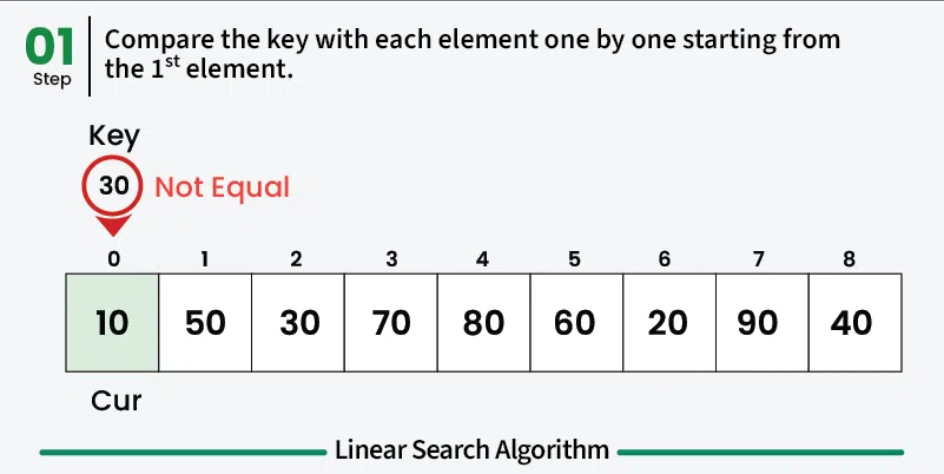

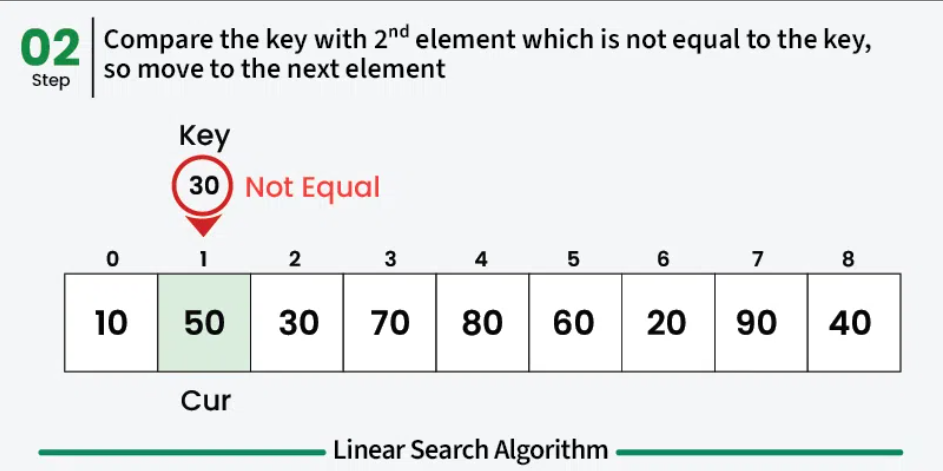

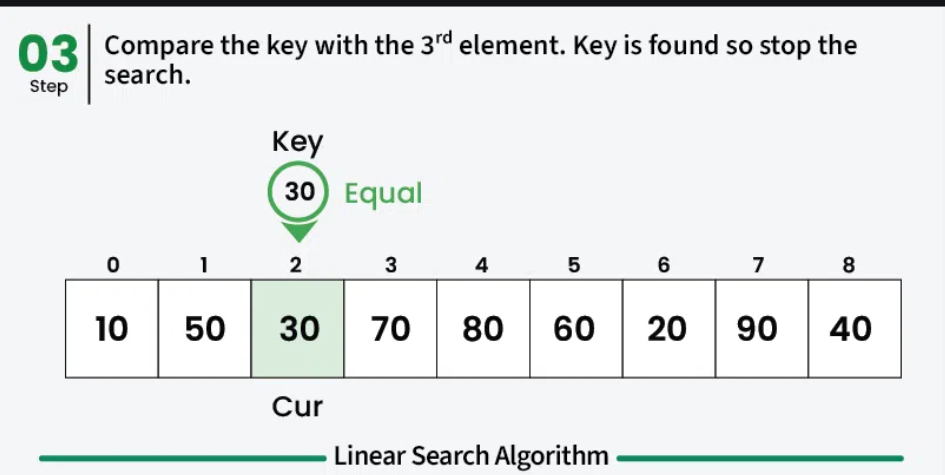

In [1]:
def linear_search(data, target):
    for i in range(len(data)):
        if data[i] == target:
            return i    #Target ditemukan, ambil indeksnya
    return -1           #Tidak ditemukan

Cetak Proses

In [2]:
def linear_search_print(data, target):
    for i in range(len(data)):
        print(f"Memeriksa indeks {i}, nilai = {data[i]}")  #Menampilkan nilai yang sedang diperiksa
        if data[i] == target:
            print(f"Target '{target}' ditemukan di indeks {i}.")
            return i
    print(f"Target '{target}' tidak ditemukan di dalam daftar.")
    return -1

nama_mahasiswa = ["Alamsyah", "Nova", "Tiara", "Gesang", "Hilmy", "Faiz", "Fadhil"]

pelaku = "Faiz"
hasil = linear_search_print(nama_mahasiswa, pelaku)


Memeriksa indeks 0, nilai = Alamsyah
Memeriksa indeks 1, nilai = Nova
Memeriksa indeks 2, nilai = Tiara
Memeriksa indeks 3, nilai = Gesang
Memeriksa indeks 4, nilai = Hilmy
Memeriksa indeks 5, nilai = Faiz
Target 'Faiz' ditemukan di indeks 5.


##### **Kesimpulan**: Linear Search dicari satu per satu secara berurutan dari indeks awal, semakin banyak datanya maka durasi akan bertambah secara linier O(n) sesuai namanya.

Cocok untuk data tidak terurut namun berukuran kecil.

## BINARY SEARCH

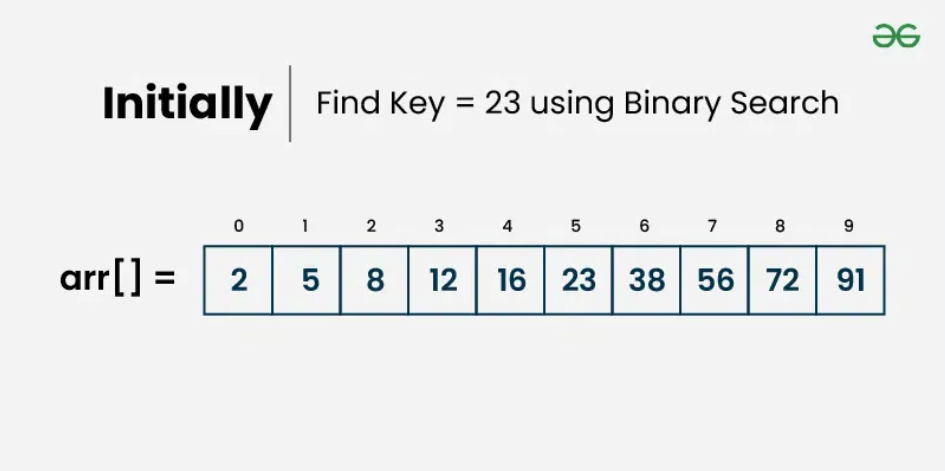

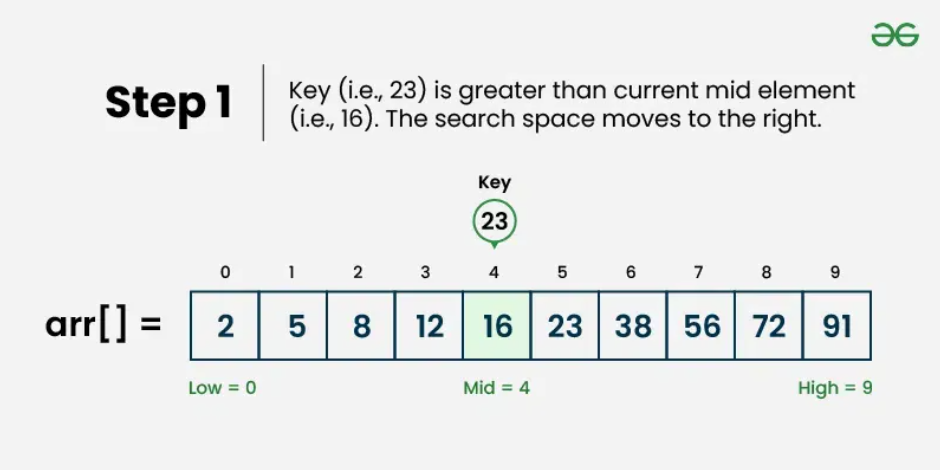

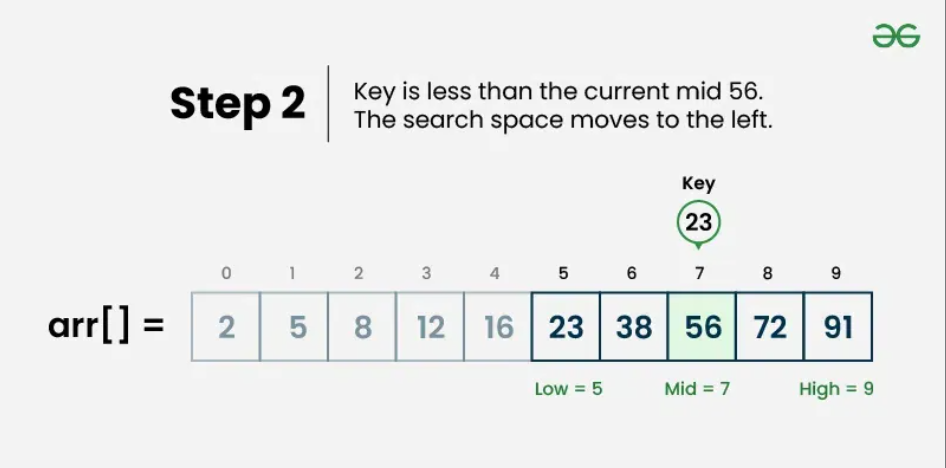

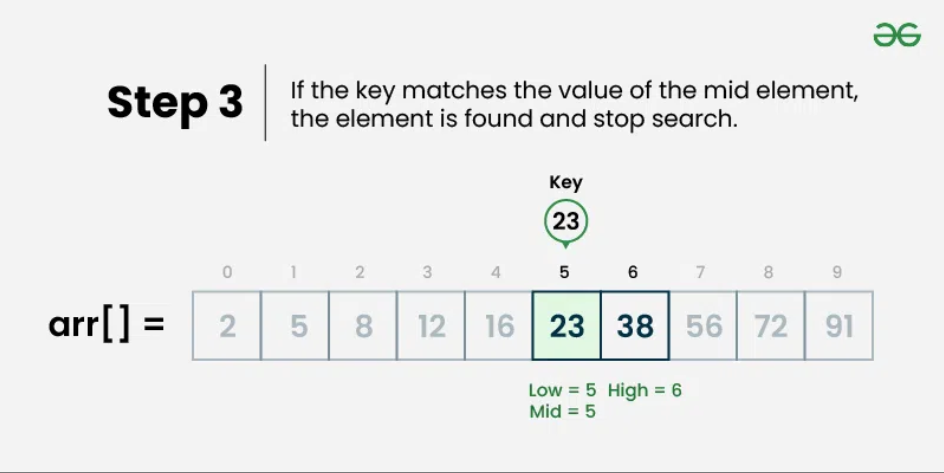

In [3]:
def binary_search(arr, left, right, target):
    while left <= right:
        mid = left + (right - left) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

Cetak Proses

In [4]:
def binary_search_print(arr, left, right, target):
    step = 1
    while left <= right:
        mid = left + (right - left) // 2
        print(f"Langkah {step}: left = {left}, right = {right}, mid = {mid}, arr[mid] = {arr[mid]}")

        if arr[mid] == target:
            print(f"Target {target} ditemukan di indeks {mid}")
            return mid
        elif arr[mid] < target:
            left = mid + 1      #Jika nilai lebih kecil dari target, tambahi indeks dari kiri
        else:
            right = mid - 1     #Jika nilai lebih besar dari target, kurangi indeks dari kanan
        step += 1

    print(f"Target {target} tidak ditemukan.")
    return -1

arr = [2, 5, 8, 12, 16, 23, 38, 56, 72, 91]
target1 = 23
target2 = 15

In [ ]:
binary_search_print(arr, 0, len(arr) - 1, target1)

-1

In [6]:
binary_search_print(arr, 0, len(arr) - 1, target2)

Langkah 1: left = 0, right = 9, mid = 4, arr[mid] = 16
Langkah 2: left = 0, right = 3, mid = 1, arr[mid] = 5
Langkah 3: left = 2, right = 3, mid = 2, arr[mid] = 8
Langkah 4: left = 3, right = 3, mid = 3, arr[mid] = 12
Target 15 tidak ditemukan.


-1

##### **Kesimpulan**: Binary Search membagi data menjadi dua bagian dari tengah, beserta bagian kiri dan kanan.
- apabila nilai tengah tersebut lebih kecil dari target, bagi data jadi dua lagi ke bagian kanan (karena targetnya lebih besar).
- apabila nilai tengah tersebut lebih besar dari target, bagi data jadi dua lagi ke bagian kiri (karena targetnya lebih kecil).

Kompleksitas O(log n).

Cocok untuk data sudah terurut walaupun berukuran besar.

## JUMP SEARCH

In [7]:
import math
def jump_search(data, target):
    n = len(data)
    jump = int(math.sqrt(n)) #Ukuran lompatan, kita ambil akar dari total data
    print(jump)

    #Tentukan batasan blok
    left = 0
    right = 0

    #Telusuri data dengan lompatan, hingga ketemu / nilainya lebih besar dari target
    while right < n and data[right] < target:
        left = right
        right += jump

    #Ketika kelewatan, baru kita mulai mundur satu per satu sampai target ketemu, pakai Linear Search
    for i in range(left, min(right, n)):
        if data[i] == target:
            return i    #Target ditemukan, ambil indeksnya
    return -1           #Tidak ditemukan

Cetak Proses

In [8]:
def jump_search_print(data, target):
    n = len(data)
    jump = int(math.sqrt(n))
    print(f"Ukuran lompatan indeks: {jump}")
    print(f"Nilai target: {target}")
    print()

    left = 0
    right = 0

    #Proses lompatan antar blok
    while right < n and data[right] < target:
        print(f"Lompat dari indeks {left} ke {right}, nilai: {data[right]}")
        left = right
        right += jump
        if right >= n:
            right = n  #Biar nggak lewat dari batas array

    print(f"Blok ditemukan antara indeks {left} dan {right - 1}")
    print("Linear Search pada blok tersebut\n")

    #Pencarian linear dalam blok
    for i in range(left, min(right, n)):
        print(f"Periksa indeks {i}, nilai: {data[i]}")
        if data[i] == target:
            print(f"✅ Target {target} ditemukan di indeks {i}")
            return i

    print(f"❌ Target {target} tidak ditemukan.")
    return -1


In [23]:
data = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,20]
target = 15

jump_search_print(data, target)

Ukuran lompatan indeks: 3
Nilai target: 15

Lompat dari indeks 0 ke 0, nilai: 1
Lompat dari indeks 0 ke 3, nilai: 7
Lompat dari indeks 3 ke 6, nilai: 13
Blok ditemukan antara indeks 6 dan 8
Linear Search pada blok tersebut

Periksa indeks 6, nilai: 13
Periksa indeks 7, nilai: 15
✅ Target 15 ditemukan di indeks 7


7

##### **Kesimpulan**: Daripada ditelusuri satu per satu langsung, Jump Search mencari data dengan cara melompat beberapa langkah, lalu mencari satu per satu di dalam blok yang diasumsikan berisi target.

Durasi pencarian lebih cepat dari Linear Search karena mengurangi operasi pengecekan dengan lompatan indeks.
Kompleksitas waktunya adalah O(√n).

Cocok untuk data sudah terurut walaupun berukuran sedang hingga besar.

## INTERPOLATION SEARCH

In [10]:
def interpolation_search(data, target):
    low = 0
    high = len(data) - 1

    while low <= high and target >= data[low] and target <= data[high]:

        #Perkiraan posisi
        pos = low + ((target - data[low]) * (high - low)) // (data[high] - data[low])

        if data[pos] == target:
            return pos
        elif data[pos] < target:
            low = pos + 1
        else:
            high = pos - 1
    return -1  #Tidak ditemukan

Cetak Proses

In [11]:
def interpolation_search_print(data, target):
    low = 0
    high = len(data) - 1
    step = 1

    while low <= high and target >= data[low] and target <= data[high]:
        #Hindari pembagian nol
        if data[high] == data[low]:
            break

        #Perkiraan posisi
        pos = low + ((target - data[low]) * (high - low)) // (data[high] - data[low])

        print(f"[Langkah {step}] Estimasi posisi: {pos}")
        print(f"  → data[{pos}] = {data[pos]}")

        if data[pos] == target:
            print(f"✅ Target {target} ditemukan di indeks {pos}")
            return pos
        elif data[pos] < target:
            print(f"  Target > data[{pos}], geser low ke {pos + 1}")
            low = pos + 1
        else:
            print(f"  Target < data[{pos}], geser high ke {pos - 1}")
            high = pos - 1

        step += 1

    print(f"❌ Target {target} tidak ditemukan.")
    return -1


In [12]:
data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
target = 100

interpolation_search_print(data, target)

[Langkah 1] Estimasi posisi: 9
  → data[9] = 100
✅ Target 100 ditemukan di indeks 9


9

##### **Kesimpulan**: Interpolation Search mencari data dengan cara memperkirakan posisi target berdasarkan nilai awal dan akhir data, bukan sekadar membagi dua rata seperti Binary Search.

Dengan rumus:
```python
pos = low + ((target - data[low]) * (high - low)) // (data[high] - data[low])

Itu adalah rumus interpolasi linear — mirip dengan cara kita mencari titik di garis lurus antara dua nilai.

- Jadi, seakan kita bisa langsung menebak indeks target, dengan memperhitungkan seberapa dekat target dengan nilai yang ada di awal dan akhir data.

- Apabila data terdistribusi merata, pencarian bisa langsung mendekati target dengan sangat sedikit langkah dengan rumus tersebut.

Kompleksitas waktunya rata-rata O(log log n), lebih cepat dari Binary Search O(log n) — tapi bisa menjadi O(n) jika data tidak merata.

Cocok untuk data sudah terurut dan terdistribusi merata, khususnya untuk data numerik.

## EXPONENTIAL SEARCH

In [13]:
def exponential_search(arr, target):
    n = len(arr)
    if n == 0:
        return -1

    if arr[0] == target:
        return 0

    i = 1
    while i < n and arr[i] <= target:
        i *= 2

    return binary_search(arr, i // 2, min(i, n - 1), target)

Cetak Proses

In [14]:
def exponential_search(arr, target):
    n = len(arr)
    if n == 0:
        print("Array kosong.")
        return -1

    if arr[0] == target:
        print("Target ditemukan di indeks 0 secara langsung.")
        return 0

    i = 1
    while i < n and arr[i] <= target:
        print(f"Perluas jangkauan: i = {i}  →  arr[{i}] = {arr[i]}")
        i *= 2

    left = i // 2
    right = min(i, n - 1)
    print(f"Jangkauan ditemukan antara indeks {left} hingga {right}, lanjut ke Binary Search.\n")

    return binary_search_print(arr, left, right, target)

arr = [2, 4, 6, 8, 10, 14, 18, 21, 27, 31, 36, 42]
target = 14

index = exponential_search(arr, target)


Perluas jangkauan: i = 1  →  arr[1] = 4
Perluas jangkauan: i = 2  →  arr[2] = 6
Perluas jangkauan: i = 4  →  arr[4] = 10
Jangkauan ditemukan antara indeks 4 hingga 8, lanjut ke Binary Search.

Langkah 1: left = 4, right = 8, mid = 6, arr[mid] = 18
Langkah 2: left = 4, right = 5, mid = 4, arr[mid] = 10
Langkah 3: left = 5, right = 5, mid = 5, arr[mid] = 14
Target 14 ditemukan di indeks 5


##### **Kesimpulan**: Exponential Search terlebih dahulu melompat secara eksponensial (1, 2, 4, 8, ...) untuk menemukan rentang di mana target kemungkinan berada. Setelah itu, barulah dilakukan Binary Search dalam rentang tersebut.

Cocok untuk data sudah terurut walaupun berukuran besar.

## FIBONACCI SEARCH

In [15]:
def fibonacci_search(arr, target):
    n = len(arr)

    #Cari angka fibonacci terkecil yang lebih besar sama dengan n
    fibMMm2 = 0   # (m-2)'th Fibonacci
    fibMMm1 = 1   # (m-1)'th Fibonacci
    fibM = fibMMm2 + fibMMm1  # m'th Fibonacci

    while fibM < n:
        fibMMm2 = fibMMm1
        fibMMm1 = fibM
        fibM = fibMMm2 + fibMMm1

    offset = -1

    while fibM > 1:
        i = min(offset + fibMMm2, n - 1)

        print(f"Periksa indeks {i}, nilai {arr[i]}")

        if arr[i] < target:
            fibM = fibMMm1
            fibMMm1 = fibMMm2
            fibMMm2 = fibM - fibMMm1
            offset = i
        elif arr[i] > target:
            fibM = fibMMm2
            fibMMm1 = fibMMm1 - fibMMm2
            fibMMm2 = fibM - fibMMm1
        else:
            print(f"Target {target} ditemukan di indeks {i}")
            return i

    if fibMMm1 and offset + 1 < n and arr[offset + 1] == target:
        print(f"Target {target} ditemukan di indeks {offset + 1}")
        return offset + 1

    print(f"Target {target} tidak ditemukan.")
    return -1

arr = [2, 4, 5, 7, 10, 14, 18, 21, 25, 30]
target = 18

fibonacci_search(arr, target)


Periksa indeks 4, nilai 10
Periksa indeks 7, nilai 21
Periksa indeks 5, nilai 14
Periksa indeks 6, nilai 18
Target 18 ditemukan di indeks 6


6

##### **Kesimpulan**: Menggunakan urutan Fibonacci untuk pencarian.

### 📜 **SOAL: Mencari & Menentukan Posisi Tugas dalam Jadwal Harian**

Kamu adalah asisten virtual seorang manajer proyek. Dalam satu hari, terdapat banyak tugas yang dijadwalkan pada jam-jam tertentu.

Kamu diberikan sebuah array bernama task_schedule[] yang berisi pasangan nilai (jam, nama_tugas) dalam format 24-jam, dan sudah terurut menaik berdasarkan jam.
Tugasmu adalah mencari apakah ada tugas yang dijadwalkan tepat pada jam tertentu (target_hour), dan jika tidak ada, berikan informasi tugas sebelumnya dan sesudahnya sebagai referensi.

In [16]:
task_schedule = [
    (7,  "Cek Email Pagi"),
    (8,  "Daily Standup Meeting"),
    (9,  "Review Task Tim A"),
    (10, "Meeting dengan Klien"),
    (11, "Desain UI Halaman Baru"),
    (12, "Istirahat Siang"),
    (13, "Diskusi Fitur Baru"),
    (14, "Implementasi Backend"),
    (15, "Code Review Tim B"),
    (16, "Meeting Evaluasi Harian"),
    (17, "Membuat Laporan"),
    (18, "Cek Kode Deployment"),
    (19, "Rapat Koordinasi Akhir Hari"),
    (20, "Cek & Respon Email"),
]

In [17]:
def search_schedule(schedule, target_hour):
    left = 0
    right = len(schedule) - 1
    closest_before = None
    closest_after = None

    while left <= right:
        mid = (left + right) // 2
        hour, task = schedule[mid]

        if hour == target_hour:
            return f"✅ Tugas ditemukan di jam {hour}: {task}\n"
        elif hour < target_hour:
            closest_before = schedule[mid]  #Simpan yang sebelum
            left = mid + 1
        else:
            closest_after = schedule[mid]  #Simpan yang setelah
            right = mid - 1

    result = f"❌ Tidak ada tugas di jam {target_hour}.\n\n"
    if closest_before:
        result += f"Sebelumnya: jam {closest_before[0]} - {closest_before[1]}\n"
    if closest_after:
        result += f"Selanjutnya: jam {closest_after[0]} - {closest_after[1]}\n"
    return result


In [18]:
print(search_schedule(task_schedule, 13))   # ✅ Ada tugas
print(search_schedule(task_schedule, 14))   # ✅ Ada tugas
print(search_schedule(task_schedule, 13.5)) # ❌ Tidak ada, tampilkan sebelum & sesudah
print(search_schedule(task_schedule, 6))    # ❌ Tidak ada, hanya sesudah
print(search_schedule(task_schedule, 21))   # ❌ Tidak ada, hanya sebelumnya
print(search_schedule(task_schedule, 12))   # ✅ Ada tugas
print(search_schedule(task_schedule, 16.5)) # ❌ Tidak ada, tampilkan sebelum & sesudah

✅ Tugas ditemukan di jam 13: Diskusi Fitur Baru

✅ Tugas ditemukan di jam 14: Implementasi Backend

❌ Tidak ada tugas di jam 13.5.

Sebelumnya: jam 13 - Diskusi Fitur Baru
Selanjutnya: jam 14 - Implementasi Backend

❌ Tidak ada tugas di jam 6.

Selanjutnya: jam 7 - Cek Email Pagi

❌ Tidak ada tugas di jam 21.

Sebelumnya: jam 20 - Cek & Respon Email

✅ Tugas ditemukan di jam 12: Istirahat Siang

❌ Tidak ada tugas di jam 16.5.

Sebelumnya: jam 16 - Meeting Evaluasi Harian
Selanjutnya: jam 17 - Membuat Laporan



Searching Algorithm apa yang digunakan tersebut?

### 🔥**SOAL HOT: Alokasi Waktu & Penyelesaian Tugas**

Anda bekerja sebagai manajer proyek di sebuah perusahaan. Tugas Anda adalah mengalokasikan waktu kepada tim untuk menyelesaikan berbagai tugas yang memiliki waktu penyelesaian yang berbeda-beda. Anda diberikan daftar waktu yang diperlukan untuk menyelesaikan setiap tugas dan jumlah total waktu yang tersedia.

Tugas Anda adalah mencari apakah mungkin menyelesaikan sejumlah tugas dalam waktu yang tersedia. Jika memungkinkan, tentukan jumlah maksimum tugas yang dapat diselesaikan dalam waktu yang terbatas.

In [19]:
def max_tasks(times, availableTime):
    times.sort()            #Urutkan data dengan Sorting Algorithm

    tasks_completed = 0     #Jumlah tugas selesai
    total_time_spent = 0    #Total waktu yang dihabiskan

    for time in times:
        if total_time_spent + time <= availableTime:
            total_time_spent += time    #Tambah waktu yang dihabiskan
            tasks_completed += 1        #Tambah jumlah tugas yang selesai
        else:
            break  #Jika waktu habis, berhenti

    if tasks_completed > 0:
        return f"Jumlah tugas yang dapat diselesaikan: {tasks_completed}"
    else:
        return "Tidak cukup waktu"

In [20]:
times1 = [2, 4, 6, 3, 1]
availableTime1 = 10
print(max_tasks(times1, availableTime1))

Jumlah tugas yang dapat diselesaikan: 4


In [21]:
times2 = [5, 7, 2, 8, 3]
availableTime2 = 4
print(max_tasks(times2, availableTime2))

Jumlah tugas yang dapat diselesaikan: 1


Masalah ini bukan hanya sekadar mencari dan mencocokkan, namun harus memahami maksud pemecahan masalah sebenarnya.

Algoritma yang digunakan belum diajarkan, namun cukup tahu saja, disebut Greedy Algorithm.

# Kesimpulan:

Pemilihan algoritma pencarian yang tepat sering bergantung pada struktur data yang digunakan dan pengetahuan awalnya tentang data tersebut.

Dengan mempelajari berbagai algoritma pencarian,
- kita dapat memahami variasi logika yang diterapkan algortima untuk menelusuri dan mendapatkan target,
- serta efisiensi durasi yang dibutuhkan untuk kasus tertentu.